In [5]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2

In [1]:
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005

In [13]:
size = 100  # size of the 2D grid
dx = 2 / size  # space step
T = 10  # total time
dt = 0.9 * dx**2 / 2  # time step
n = int(T / dt)
n

55555

In [14]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

In [15]:
interval = 5000
Us = []

In [16]:
# We simulate the PDE with the finite difference method.
for i in range(n):
    if not i % interval:
        Us.append(U.copy())
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
    V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]

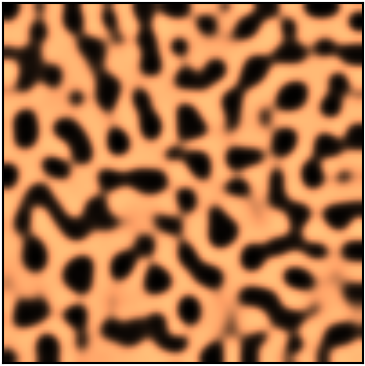

In [17]:
plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

In [18]:
len(Us)

12

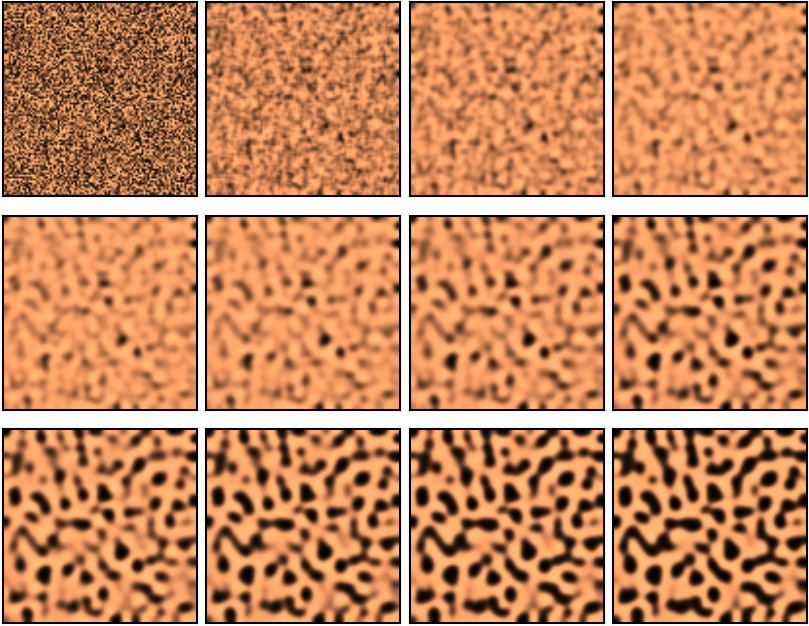

In [26]:
plt.rcParams['figure.subplot.hspace'] = 0.05
plt.rcParams['figure.subplot.wspace'] = 0.05

fig, axes = plt.subplots(3, 4, figsize=(4, 3.5))
for ax, u in zip(axes.flatten(), Us):
    ax.imshow(u, cmap=plt.cm.copper, extent=[-1, 1, -1, 1])
    ax.set_xticks([])
    ax.set_yticks([])

In [28]:
[sum(u.flatten()) for u in Us]

[4968.5663143434831,
 3803.9377285701626,
 3234.1342746548744,
 2824.6587160553477,
 2485.5313063530994,
 2174.8419944690609,
 1876.6859776790886,
 1597.0600655866051,
 1350.4929788974225,
 1143.5648844149771,
 974.47295093320156,
 838.88174862126118]